## prepare

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from kaggler.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [110]:
dirr = 'C:/Users/rsh15/Desktop/seunghuni/dataset/dacon/cardfraud/'
train = pd.read_csv(dirr+'train.csv').iloc[:,1:]
test  = pd.read_csv(dirr+'test.csv').iloc[:,1:]

In [111]:
train_y = train['credit'].astype(int)
train['credit'] = train['credit'].astype(int)
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [112]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2


In [113]:
train.describe()

,child_num,income_total,days_birth,days_employed,flag_mobil,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


## vis

### target

<AxesSubplot:xlabel='credit', ylabel='count'>

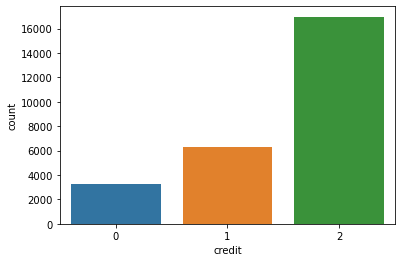

In [114]:
sns.countplot(train['credit'])

### binary(gender, car, reality)

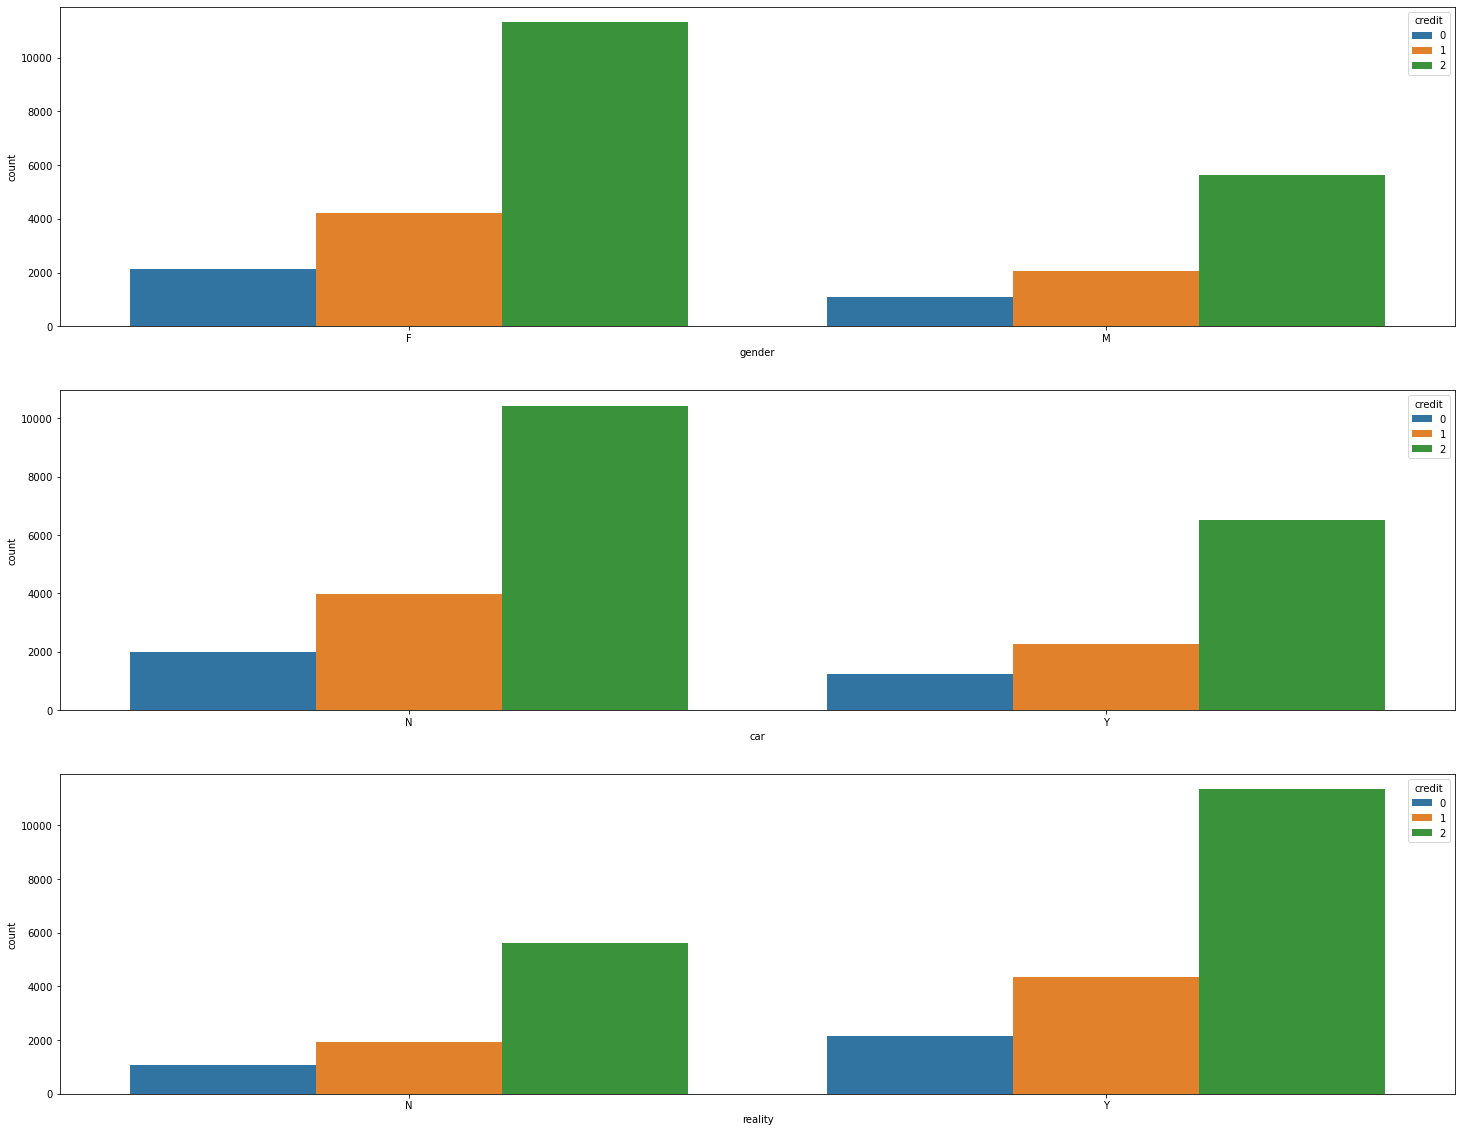

In [115]:
fig,ax = plt.subplots(3,1,figsize=(25,20))

sns.countplot(data=train,x='gender',hue='credit',ax=ax[0]);
sns.countplot(data=train,x='car',hue='credit',ax=ax[1]);
sns.countplot(data=train,x='reality',hue='credit',ax=ax[2]);

#### with car & reality both?

In [116]:
car_reality = np.where((train['car']=='Y') & (train['reality']=='Y'),1,0)
car_reality

array([0, 0, 1, ..., 0, 0, 0])

([<matplotlib.patches.Wedge at 0x275af37e9a0>,
 [Text(1.0189369515826188, 0.41444841500423224, 'credit0'),
  Text(0.0560404476436976, 1.0985715580825375, 'credit1'),
  Text(-0.4658209098864616, -0.9964993125499632, 'credit2')],
 [Text(0.5557837917723374, 0.22606277182049028, '12.3%'),
  Text(0.030567516896562324, 0.5992208498632022, '23.8%'),
  Text(-0.25408413266534263, -0.5435450795727071, '63.9%')])

Text(0.5, 1.0, 'Having Car & Reality')

([<matplotlib.patches.Wedge at 0x275b481e8b0>,
 [Text(1.0249359130311364, 0.3993824910772018, 'credit0'),
  Text(0.10164691127313619, 1.0952935247816593, 'credit1'),
  Text(-0.492384205636868, -0.9836451565678299, 'credit2')],
 [Text(0.5590559525624379, 0.21784499513301914, '11.8%'),
  Text(0.05544376978534701, 0.5974328316990868, '23.4%'),
  Text(-0.26857320307465526, -0.5365337217642708, '64.8%')])

Text(0.5, 1.0, 'No Car & Reality')

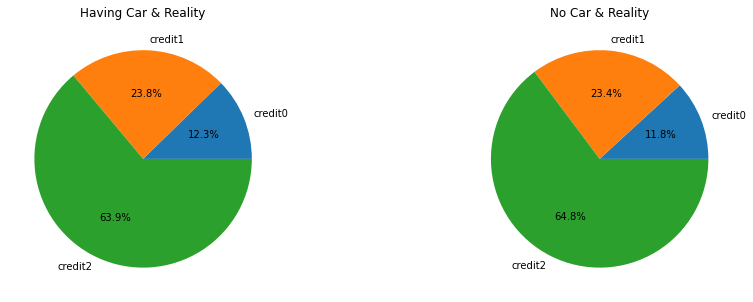

In [117]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

df_vis = train.groupby([car_reality,'credit']).size().reset_index(name='countt')

ax[0].pie(df_vis[df_vis['level_0']==0]['countt'],autopct='%.1f%%',
          labels=['credit'+str(a) for a in range(0,3)])
ax[0].set_title('Having Car & Reality')

ax[1].pie(df_vis[df_vis['level_0']==1]['countt'],autopct='%.1f%%',
          labels=['credit'+str(a) for a in range(0,3)])
ax[1].set_title('No Car & Reality')

### child num

<AxesSubplot:xlabel='child_num', ylabel='count'>

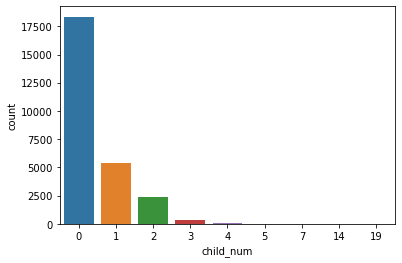

In [118]:
sns.countplot(train['child_num'])

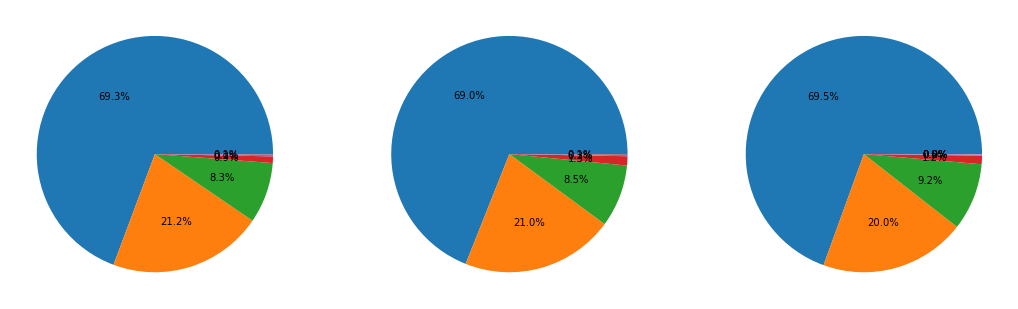

In [119]:
fig,ax = plt.subplots(1,3,figsize=(18,8))

df_vis = train.groupby(['credit','child_num']).size().reset_index(name='countt')

ax[0].pie(df_vis[df_vis['credit']==0]['countt'],autopct='%.1f%%');
ax[1].pie(df_vis[df_vis['credit']==1]['countt'],autopct='%.1f%%');
ax[2].pie(df_vis[df_vis['credit']==2]['countt'],autopct='%.1f%%');

### income_total

<AxesSubplot:xlabel='income_total', ylabel='Density'>

<AxesSubplot:xlabel='income_total', ylabel='Density'>

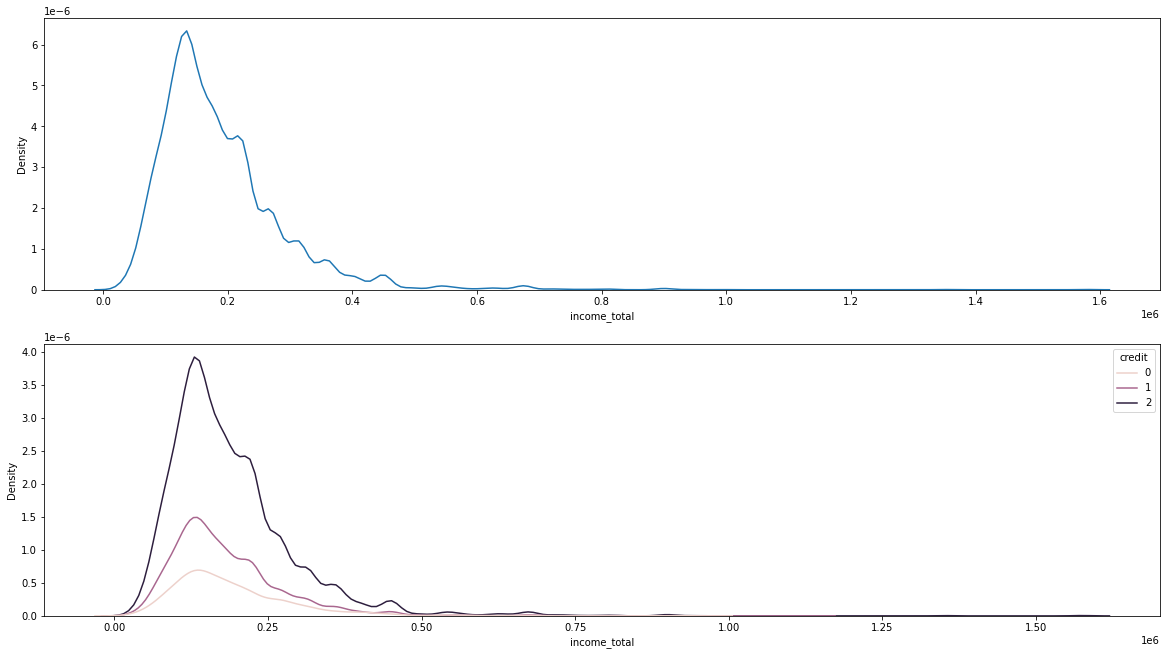

In [120]:
fig,ax = plt.subplots(2,1,figsize=(20,11))

sns.kdeplot(train['income_total'],ax=ax[0])
sns.kdeplot(data=train,x='income_total',hue='credit',ax=ax[1])

### categorical pieplot

#### income_type

직업별 credit에 큰 차이가 없음. student는 가장 높은 신용인 0을 제외하고 반반.

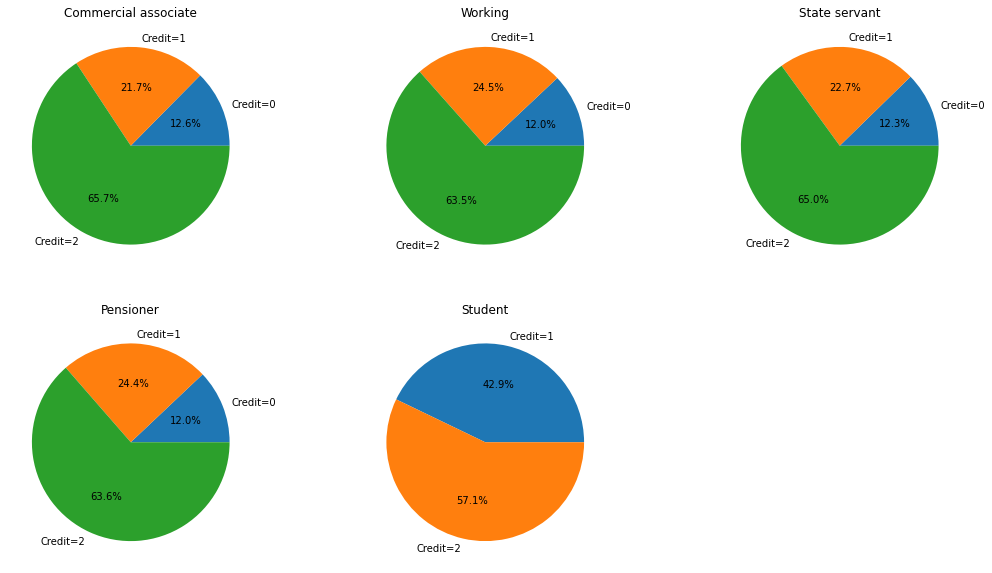

In [121]:
df_vis = train.groupby(['income_type','credit']).size().reset_index(name='countt')

fig,ax = plt.subplots(2,3,figsize=(18,10))
idxx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
income_idx = train['income_type'].unique()

for k in range(0,5):
    if k < 4:
        label_list = ['Credit='+str(a) for a in range(0,3)]
    else:
        label_list = ['Credit='+str(a) for a in range(1,3)]

    ax[idxx[k]].pie(df_vis[df_vis['income_type']==income_idx[k]]['countt'],
                    autopct='%.1f%%',labels=label_list);
    ax[idxx[k]].set_title(income_idx[k]);
ax[1,2].remove();

#### edu_type

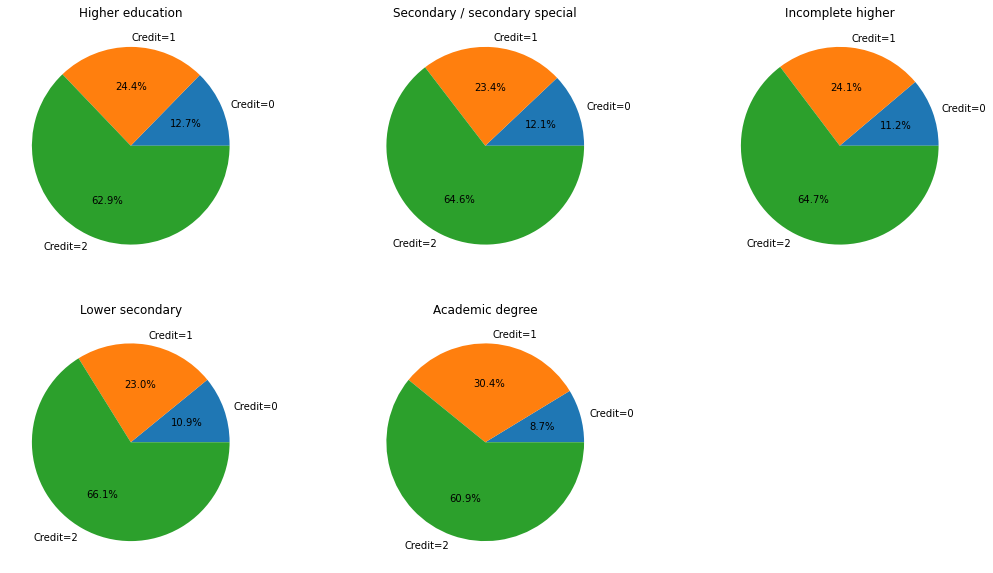

In [122]:
df_vis = train.groupby(['edu_type','credit']).size().reset_index(name='countt')

fig,ax = plt.subplots(2,3,figsize=(18,10))
idxx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
edu_idx = train['edu_type'].unique()

for k in range(0,5):
    ax[idxx[k]].pie(df_vis[df_vis['edu_type']==edu_idx[k]]['countt'],
                    autopct='%.1f%%',labels=['Credit='+str(a) for a in range(0,3)]);
    ax[idxx[k]].set_title(edu_idx[k]);
ax[1,2].remove();

In [123]:
df_vis = train.groupby(['credit','edu_type']).size().reset_index(name='countt')
df_vis

,credit,edu_type,countt
0,0,Academic degree,2
1,0,Higher education,909
2,0,Incomplete higher,114
3,0,Lower secondary,28
4,0,Secondary / secondary special,2169
5,1,Academic degree,7
6,1,Higher education,1751
7,1,Incomplete higher,246
8,1,Lower secondary,59
9,1,Secondary / secondary special,4204


#### family_type

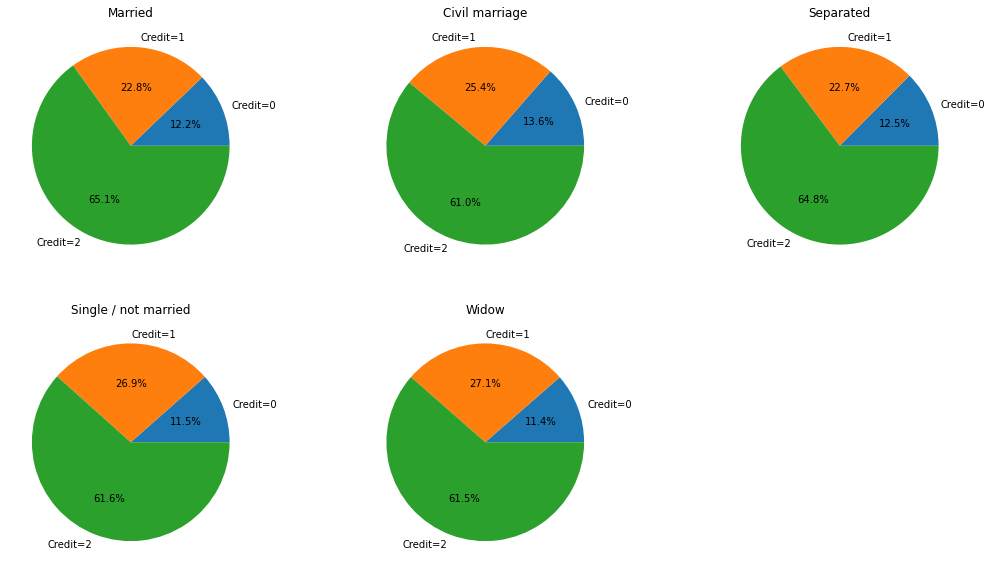

In [124]:
df_vis = train.groupby(['family_type','credit']).size().reset_index(name='countt')

fig,ax = plt.subplots(2,3,figsize=(18,10))
idxx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
fam_idx = train['family_type'].unique()

for k in range(0,5):
    ax[idxx[k]].pie(df_vis[df_vis['family_type']==fam_idx[k]]['countt'],
                    autopct='%.1f%%',labels=['Credit='+str(a) for a in range(0,3)]);
    ax[idxx[k]].set_title(fam_idx[k]);
ax[1,2].remove();

#### house_type

([<matplotlib.patches.Wedge at 0x275c4ac0be0>,
 [Text(1.0032897987711518, 0.45100951174198334, 'Credit=0'),
  Text(0.12226134105025505, 1.0931844146732945, 'Credit=1'),
  Text(-0.5597274310256594, -0.9469451953293897, 'Credit=2')],
 [Text(0.5472489811479009, 0.24600518822289996, '13.4%'),
  Text(0.06668800420923002, 0.5962824080036151, '19.6%'),
  Text(-0.30530587146854143, -0.516515561088758, '67.0%')])

Text(0.5, 1.0, 'Municipal apartment')

([<matplotlib.patches.Wedge at 0x275c4ae6070>,
 [Text(1.02088024934807, 0.4096382751782635, 'Credit=0'),
  Text(0.07467371854983848, 1.0974624530059967, 'Credit=1'),
  Text(-0.47799600159261096, -0.9907168225388508, 'Credit=2')],
 [Text(0.5568437723716745, 0.22343905918814372, '12.1%'),
  Text(0.040731119209002804, 0.5986158834578164, '23.5%'),
  Text(-0.26072509177778774, -0.5403909941121003, '64.3%')])

Text(0.5, 1.0, 'House / apartment')

([<matplotlib.patches.Wedge at 0x275c4ace2b0>,
 [Text(1.0225921204760713, 0.4053459696854682, 'Credit=0'),
  Text(0.03710720896841429, 1.0993739377675709, 'Credit=1'),
  Text(-0.4396112602538871, -1.0083362236168991, 'Credit=2')],
 [Text(0.5577775202596752, 0.221097801646619, '12.0%'),
  Text(0.020240295800953247, 0.599658511509584, '24.9%'),
  Text(-0.23978796013848383, -0.5500015765183086, '63.1%')])

Text(0.5, 1.0, 'With parents')

([<matplotlib.patches.Wedge at 0x275c4acef40>,
 [Text(1.013236021342023, 0.428197110049785, 'Credit=0'),
  Text(-0.09413252238638697, 1.095964902827265, 'Credit=1'),
  Text(-0.3399185762739153, -1.046162206115244, 'Credit=2')],
 [Text(0.5526741934592853, 0.23356206002715543, '12.7%'),
  Text(-0.051345012210756526, 0.5977990379057808, '27.3%'),
  Text(-0.1854101325130447, -0.5706339306083149, '60.0%')])

Text(0.5, 1.0, 'Co-op apartment')

([<matplotlib.patches.Wedge at 0x275c4af0430>,
 [Text(1.0270827380885768, 0.3938287053027905, 'Credit=0'),
  Text(-0.2593348866858278, 1.0689927111761095, 'Credit=1'),
  Text(-0.14058329992857826, -1.0909795304134682, 'Credit=2')],
 [Text(0.5602269480483145, 0.21481565743788572, '11.7%'),
  Text(-0.14145539273772426, 0.5830869333687869, '34.3%'),
  Text(-0.07668179996104267, -0.5950797438618917, '54.1%')])

Text(0.5, 1.0, 'Rented apartment')

([<matplotlib.patches.Wedge at 0x275c4afe910>,
 [Text(1.0145187331986458, 0.42514907972264865, 'Credit=0'),
  Text(-0.01818731106026549, 1.099849635957751, 'Credit=1'),
  Text(-0.40831704125524204, -1.0214094153768924, 'Credit=2')],
 [Text(0.5533738544719886, 0.2318994980305356, '12.6%'),
  Text(-0.00992035148741754, 0.5999179832496823, '25.3%'),
  Text(-0.2227183861392229, -0.5571324083873959, '62.1%')])

Text(0.5, 1.0, 'Office apartment')

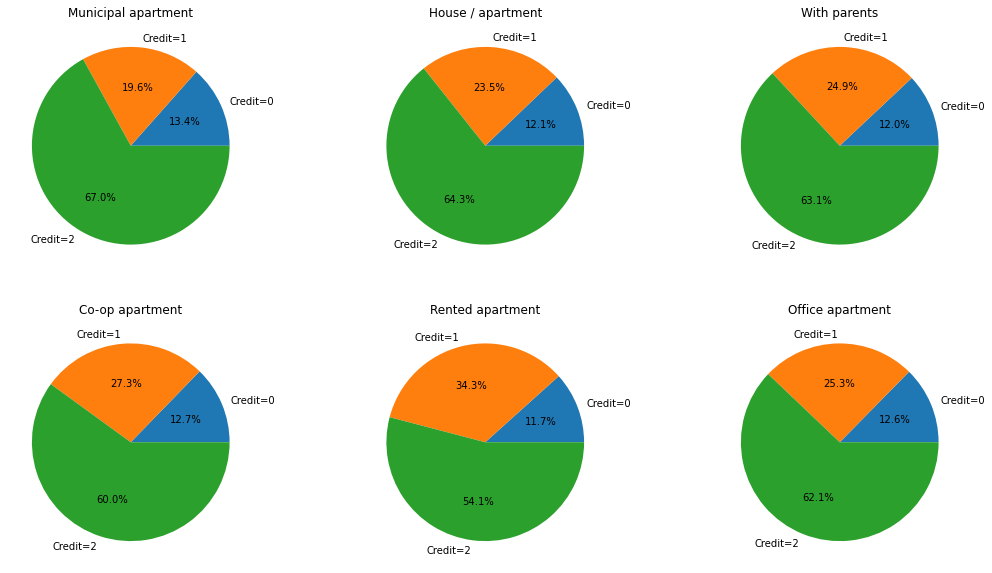

In [125]:
df_vis = train.groupby(['house_type','credit']).size().reset_index(name='countt')

fig,ax = plt.subplots(2,3,figsize=(18,10))
idxx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
house_idx = train['house_type'].unique()

for k in range(0,6):
    ax[idxx[k]].pie(df_vis[df_vis['house_type']==house_idx[k]]['countt'],
                    autopct='%.1f%%',labels=['Credit='+str(a) for a in range(0,3)]);
    ax[idxx[k]].set_title(house_idx[k]);

### days_birth

In [126]:
train['days_age'] = (train['days_birth']*-1) / 365
train['days_age']

0        38.079452
1        31.178082
2        52.293151
3        41.336986
4        41.197260
           ...    
26452    33.093151
26453    41.893151
26454    27.621918
26455    27.794521
26456    53.613699
Name: days_age, Length: 26457, dtype: float64

<AxesSubplot:xlabel='days_age', ylabel='Count'>

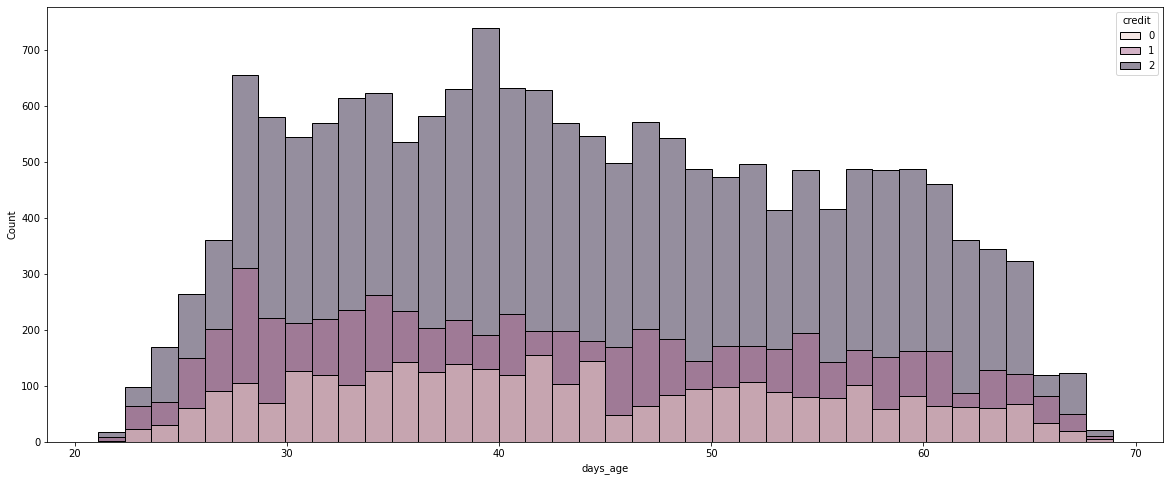

In [127]:
fig,ax = plt.subplots(figsize=(20,8))

sns.histplot(x=train['days_age'],hue=train_y)

<AxesSubplot:xlabel='days_age', ylabel='Density'>

<AxesSubplot:xlabel='days_age', ylabel='Density'>

<AxesSubplot:xlabel='days_age', ylabel='Density'>

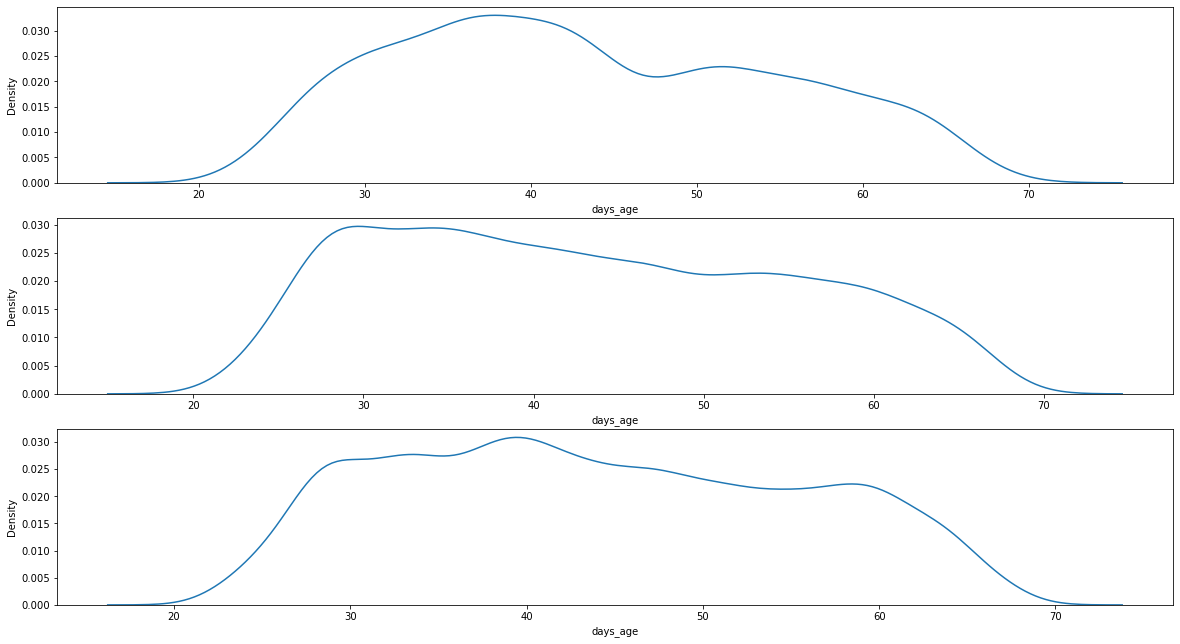

In [128]:
fig,ax = plt.subplots(3,1,figsize=(20,11));

for k in range(0,3):
    sns.kdeplot(train.loc[train['credit']==k,'days_age'],ax=ax[k]);

### days_employed

데이터 수집 당시(0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미.   
그런데 최대값이 양수.

In [129]:
train[train['days_employed'] > 0]['days_employed'].unique()

array([365243], dtype=int64)

0보다 큰 값은 365243뿐. income_type를 보면 전부 Pensioner. 연금수령자이다.

In [130]:
train[train['days_employed']==365243]['income_type'].unique()

array(['Pensioner'], dtype=object)

In [131]:
train[train['income_type']=='Pensioner']['days_employed'].unique()

array([365243,  -1325,  -2208,  -2745,   -586,   -198,   -443,  -3680,
         -673,   -672,   -620,  -5521], dtype=int64)

In [132]:
train[train['days_employed'] < 365243]['days_employed'].agg(['min','max'])

min   -15713
max      -17
Name: days_employed, dtype: int64

In [133]:
train.loc[train['days_employed'] == 365243,'days_employed'] = 0

In [134]:
train[train['days_employed'] < 365243]['days_employed'].agg(['min','max'])

min   -15713
max        0
Name: days_employed, dtype: int64

In [135]:
train['days_worked'] = (train['days_employed'] * -1) / 365
train['days_worked']

0        12.901370
1         4.219178
2        12.147945
3         5.731507
4         5.767123
           ...    
26452     5.435616
26453     6.780822
26454     5.520548
26455     0.293151
26456     2.775342
Name: days_worked, Length: 26457, dtype: float64

<AxesSubplot:xlabel='days_worked', ylabel='Count'>

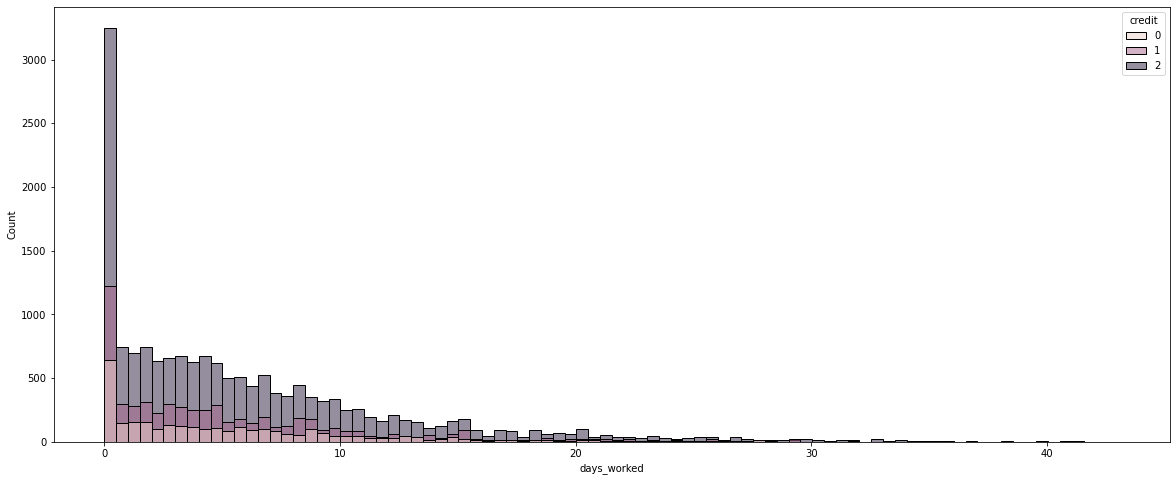

In [136]:
fig,ax = plt.subplots(figsize=(20,8))

sns.histplot(x=train['days_worked'],hue=train_y)

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

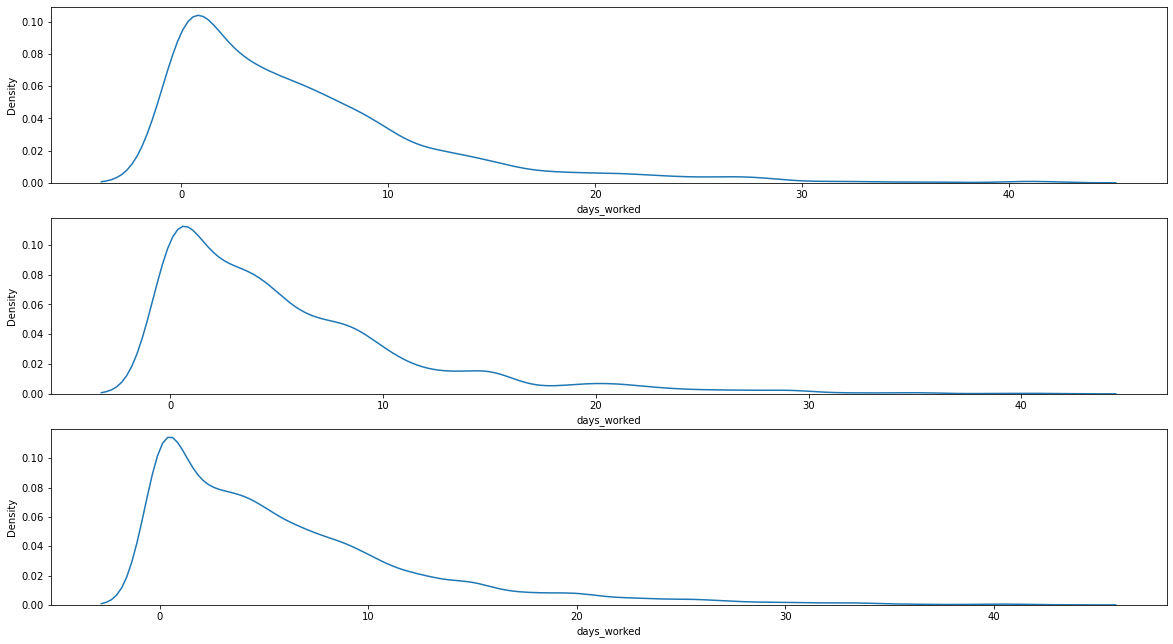

In [137]:
fig,ax = plt.subplots(3,1,figsize=(20,11));

for k in range(0,3):
    sns.kdeplot(train.loc[(train['credit']==k),'days_worked'],ax=ax[k]);

(<Figure size 1296x576 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

<AxesSubplot:xlabel='days_worked', ylabel='Density'>

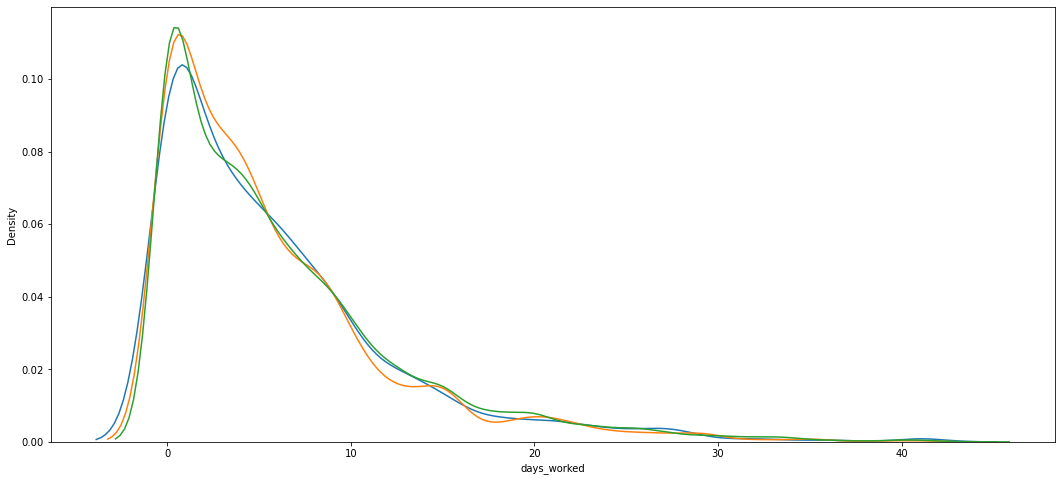

In [138]:
plt.subplots(figsize=(18,8))

for k in range(0,3):
    sns.kdeplot(train.loc[(train['credit']==k),'days_worked']);

### flab_mobil

모두 1이라서 의미가 있는 컬럼이 아님.

In [139]:
train['flag_mobil'].unique()

array([1], dtype=int64)

### binary(work_phone, phone, email)

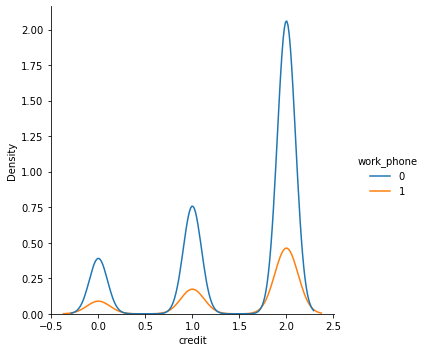

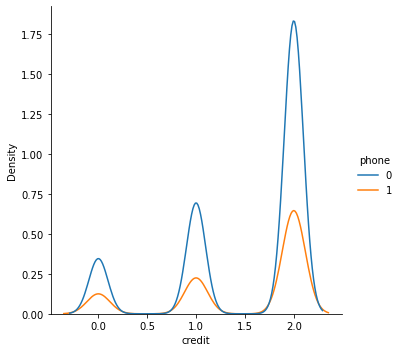

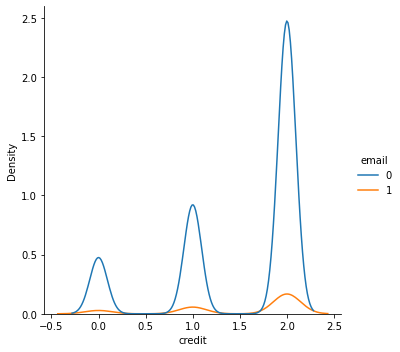

In [140]:
sns.displot(data=train,x='credit',hue='work_phone',kind='kde')
sns.displot(data=train,x='credit',hue='phone',kind='kde')
sns.displot(data=train,x='credit',hue='email',kind='kde')

#### with work phone, phone, email both

In [141]:
train['phone_email_1'] = train['work_phone'] * train['phone'] * train['email']
train['phone_email_0'] = np.where((train['work_phone']==0) & (train['phone']==0) & (train['email']==0),1,0)

### occyp_type

In [142]:
train.loc[train['occyp_type'].isna(),'occyp_type'] = 'No record'

In [143]:
train['occyp_type'].unique()

array(['No record', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [144]:
train.groupby(['occyp_type','credit']).size()

occyp_type             credit
Accountants            0          118
                       1          227
                       2          557
Cleaning staff         0           40
                       1           93
                       2          270
Cooking staff          0           58
                       1          110
                       2          289
Core staff             0          347
                       1          622
                       2         1677
Drivers                0          187
                       1          358
                       2         1030
HR staff               0            7
                       1            4
                       2           51
High skill tech staff  0          123
                       1          270
                       2          647
IT staff               0            8
                       1           10
                       2           23
Laborers               0          586
                    

### family size

In [145]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [146]:
train[train['family_size']==20]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,work_phone,phone,email,occyp_type,family_size,begin_month,credit,days_age,days_worked,phone_email_1,phone_email_0
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2,30.293151,5.076712,0,0


In [147]:
train['family_without_child'] = train['family_size'] - train['child_num']

### begin month

In [148]:
train['begin_month'].agg(['min','max'])

min   -60.0
max     0.0
Name: begin_month, dtype: float64

In [149]:
# when people make card after work? by month
train['employ-card'] = ((train['days_employed']*-1)/30) - (train['begin_month']*-1)

In [150]:
# people make card before start to work?
train['card_before_employ'] = (train['employ-card'] < 0)

## Before model(scaler, one-hot..etc)

In [151]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,work_phone,phone,email,occyp_type,family_size,begin_month,credit,days_age,days_worked,phone_email_1,phone_email_0,family_without_child,employ-card,card_before_employ
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,No record,2.0,-6.0,1,38.079452,12.901370,0,1,2.0,150.966667,False
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1,31.178082,4.219178,0,0,2.0,46.333333,False
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2,52.293151,12.147945,0,0,2.0,125.800000,False
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0,41.336986,5.731507,0,0,2.0,32.733333,False
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2,41.197260,5.767123,0,1,2.0,44.166667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1,33.093151,5.435616,0,1,2.0,64.133333,False
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,No record,2.0,-47.0,2,41.893151,6.780822,0,1,1.0,35.500000,False
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2,27.621918,5.520548,0,1,2.0,42.166667,False
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2,27.794521,0.293151,0,1,1.0,-55.433333,True


In [152]:
# scaler
scaler = MinMaxScaler()
scaler_cols = ['income_total','days_worked','days_age','family_without_child','employ-card','family_size','begin_month',
               'days_birth','days_employed']
train[scaler_cols] = scaler.fit_transform(train[scaler_cols])

In [153]:
# one hot
lbe = LabelEncoder(min_obs=10)
cate_col = ['income_type','family_type','house_type','occyp_type','gender','car','reality','card_before_employ']
train.loc[:,cate_col] = lbe.fit_transform(train[cate_col])

In [154]:
# ordered category(edu_type)
train['edu_type'] = train['edu_type'].replace({'Higher education':3,'Secondary / secondary special':1,
                                               'Incomplete higher':2,'Lower secondary':0,'Academic degree':4})

In [155]:
train_x = train.drop(['credit','flag_mobil'],axis=1)
train_y = train['credit']

## making models

### sklearn

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import log_loss, make_scorer
from xgboost import XGBClassifier

In [94]:
train = train[-train.duplicated()]

In [96]:
rfc = RandomForestClassifier(n_estimators=1000)
xgb = XGBClassifier(n_estimators=1000)

In [97]:
scores = abs(cross_val_score(rfc,train_x,train_y,cv=10,scoring='neg_log_loss',n_jobs=-1))
print('Average Random Forest log loss :',np.mean(scores))

Average Random Forest log loss : 0.8139384642243399


In [63]:
scores = abs(cross_val_score(xgb,train_x,train_y,cv=10,scoring='neg_log_loss',n_jobs=-1))
print('Average XGBoost log loss :',np.mean(scores))

Average XGBoost log loss : 0.8634885025003836


In [78]:
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=1000)

In [79]:
feature_df_rf = pd.DataFrame({
    'cols' : train_x.columns,
    'importances' : rfc.feature_importances_}).sort_values('importances',ascending=False)
feature_df_rf.head()

,cols,importances
12,begin_month,0.222667
18,employ-card,0.158969
13,days_age,0.084277
6,days_birth,0.084155
4,income_total,0.070163


In [70]:
feature_df_xgb = pd.DataFrame({
    'cols' : train_x.columns,
    'importances' : xgb.feature_importances_}).sort_values('importances',ascending=False)
feature_df_xgb.head()

,cols,importances
12,begin_month,0.028184
34,house_type_Rented apartment,0.027227
54,occyp_type_Waiters/barmen staff,0.026193
32,house_type_Municipal apartment,0.025782
25,family_type_Civil marriage,0.024889


In [80]:
feature_selected_rf = feature_df_rf.loc[feature_df_rf['importances'] > 0.05,'cols']
feature_selected_rf

12      begin_month
18      employ-card
13         days_age
6        days_birth
4      income_total
7     days_employed
14      days_worked
Name: cols, dtype: object

In [79]:
abs(cross_val_score(rfc,train_x[feature_selected_rf],train_y,cv=10,scoring='neg_log_loss',n_jobs=-1))

array([0.86863026, 0.80824529, 0.84975951, 0.83480729, 0.86032657,
       0.83129592, 0.8835292 , 0.84720269, 0.84932298, 0.86067461])

In [81]:
feature_selected_y = list(feature_selected_rf)
feature_selected_y.append('credit')
feature_selected_y

['begin_month',
 'employ-card',
 'days_age',
 'days_birth',
 'income_total',
 'days_employed',
 'days_worked',
 'credit']

### lightgbm

In [99]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold
from bayes_opt import BayesianOptimization

In [100]:
#https://www.kaggle.com/lucamassaron/kaggle-days-paris-gbdt-workshop

In [104]:
# set up the classifier with standard configuration
# laeter we will more performing parameters with Bayesian Optimization
params = {
    'learning_rate':0.06,
    'max_depth': 10,
    'n_estimators':2000,
    'min_data_in_leaf':10,
    'boosting':'gbdt',
    'objective':'multiclass',
    'feature_fraction':.3,
    'num_class':3,
    'seed':1
}

lgb_data = lgb.Dataset(data=train_x, label=train_y)

In [105]:
cv_results = lgb.cv(params,
                    lgb_data,
                    nfold = 10,
                    num_boost_round=10,
                    stratified=False)

print('logloss-mean',np.mean(cv_results['multi_logloss-mean']))
print('logloss-stdv',np.mean(cv_results['multi_logloss-stdv']))

logloss-mean 0.7658185512562181
logloss-stdv 0.011715238675941937


In [156]:
feature_selected_y

['begin_month',
 'employ-card',
 'days_age',
 'days_birth',
 'income_total',
 'days_employed',
 'days_worked',
 'credit']

#### bayesian

In [256]:
kfold_bay = StratifiedKFold(5,shuffle=True,random_state=0)
def lgbm_cv(learning_rate, num_leaves, max_depth, min_child_weight, colsample_bytree, feature_fraction, bagging_fraction, lambda_l1, lambda_l2):
    model = lgb.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators = 300,
                                boosting = 'dart',
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                min_child_weight = int(round(min_child_weight)),
                                colsample_bytree = colsample_bytree,
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0)
                               )
    
    score = cross_val_score(model,train_x,train_y,cv=kfold_bay,scoring='neg_log_loss').mean()
    return -score

In [257]:
pbounds = {'learning_rate' : (0.0001, 0.05),
           'num_leaves': (300, 600),
           'max_depth': (2, 25),
           'min_child_weight': (30, 100),
           'colsample_bytree': (0, 0.99),
           'feature_fraction': (0.0001, 0.99),
           'bagging_fraction': (0.0001, 0.99),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
          }

In [258]:
lgbm_bayesian = BayesianOptimization(f = lgbm_cv,pbounds = pbounds, verbose = 2, random_state = 1996)

In [259]:
lgbm_bayesian.maximize(init_points=5,n_iter = 20,acq='ei',xi=0.01)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

## pycaret

In [159]:
from pycaret.classification import *
from sklearn.metrics import log_loss

In [177]:
pycar = setup(pd.concat([train_x,train_y],axis=1),target='credit',
              feature_selection=True,feature_selection_threshold=0.3)
add_metric('logloss','LogLoss',log_loss,greater_is_better=False)

,Description,Value
0,session_id,1912
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 25)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


Name                                                        LogLoss
Display Name                                                LogLoss
Score Function            <function log_loss at 0x00000275A8425700>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [178]:
best5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6994,0.7006,0.4429,0.6796,0.6343,0.2619,0.3266,0.0000,2.7120
catboost,CatBoost Classifier,0.6991,0.6965,0.4405,0.6824,0.6324,0.2580,0.3253,0.0000,12.2520
rf,Random Forest Classifier,0.6958,0.7258,0.5030,0.6656,0.6669,0.3324,0.3482,0.0000,0.7640
lightgbm,Light Gradient Boosting Machine,0.6943,0.6892,0.4174,0.6834,0.6129,0.2222,0.3107,0.0000,0.3330
gbc,Gradient Boosting Classifier,0.6910,0.6491,0.4074,0.6455,0.6034,0.2046,0.3014,0.0000,2.7590
ada,Ada Boost Classifier,0.6897,0.6231,0.4042,0.6478,0.5999,0.1969,0.2982,0.0000,0.2870
et,Extra Trees Classifier,0.6728,0.7000,0.5031,0.6465,0.6529,0.3076,0.3147,0.0000,0.6970
qda,Quadratic Discriminant Analysis,0.6423,0.5966,0.3659,0.5660,0.5512,0.0862,0.1227,0.0000,0.0400
lr,Logistic Regression,0.6414,0.6062,0.3342,0.5591,0.5021,0.0028,0.0296,0.0000,1.5310
lda,Linear Discriminant Analysis,0.6413,0.6061,0.3341,0.5334,0.5018,0.0024,0.0257,0.0000,0.0460


In [179]:
blended = blend_models(best5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7030,0.7224,0.4387,0.7075,0.6314,0.2558,0.3392,-0.0000
1,0.7030,0.7316,0.4376,0.6931,0.6320,0.2599,0.3375,-0.0000
2,0.6992,0.7106,0.4309,0.7113,0.6252,0.2464,0.3245,-0.0000
3,0.6949,0.7280,0.4267,0.6741,0.6209,0.2344,0.3120,-0.0000
4,0.6884,0.7223,0.4155,0.6525,0.6100,0.2146,0.2900,-0.0000
5,0.7052,0.7228,0.4380,0.6996,0.6334,0.2627,0.3444,-0.0000
6,0.6965,0.7265,0.4271,0.6857,0.6216,0.2388,0.3162,-0.0000
7,0.7025,0.7185,0.4347,0.7154,0.6284,0.2516,0.3388,-0.0000
8,0.7046,0.7470,0.4373,0.6991,0.6322,0.2624,0.3437,-0.0000
9,0.6937,0.7189,0.4260,0.6834,0.6189,0.2298,0.3085,-0.0000


In [166]:
blended

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1...
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.

### tune model with pycaret

In [167]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6944,0.6779,0.4232,0.6761,0.6163,0.2319,0.3189,-0.0000
1,0.6901,0.6868,0.4187,0.7053,0.6097,0.2186,0.3041,-0.0000
2,0.6922,0.7026,0.4146,0.7020,0.6074,0.2182,0.3138,-0.0000
3,0.6895,0.6972,0.4189,0.6984,0.6097,0.2210,0.3029,-0.0000
4,0.6906,0.7019,0.4175,0.6768,0.6093,0.2220,0.3076,-0.0000
5,0.6987,0.7050,0.4300,0.6863,0.6227,0.2483,0.3331,-0.0000
6,0.6955,0.7284,0.4240,0.6684,0.6171,0.2399,0.3219,-0.0000
7,0.7014,0.7099,0.4316,0.7095,0.6248,0.2538,0.3420,-0.0000
8,0.6960,0.6914,0.4272,0.6854,0.6192,0.2407,0.3248,-0.0000
9,0.6969,0.7011,0.4267,0.6929,0.6194,0.2431,0.3260,-0.0000


In [170]:
tune_lgbm_sklearn = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6884,0.6416,0.4058,0.6226,0.5988,0.1994,0.3031,-0.0000
1,0.6879,0.6505,0.4095,0.7374,0.6020,0.2048,0.2978,-0.0000
2,0.6857,0.6680,0.4011,0.6065,0.5939,0.1938,0.2919,-0.0000
3,0.6863,0.6674,0.4049,0.6073,0.5972,0.2002,0.2938,-0.0000
4,0.6879,0.6521,0.4058,0.6117,0.5986,0.2036,0.3005,-0.0000
5,0.6992,0.6707,0.4241,0.7475,0.6181,0.2433,0.3360,-0.0000
6,0.6884,0.6843,0.4093,0.6103,0.6019,0.2092,0.3004,-0.0000
7,0.6992,0.6692,0.4248,0.6254,0.6188,0.2444,0.3353,-0.0000
8,0.6884,0.6682,0.4121,0.6090,0.6046,0.2140,0.2990,-0.0000
9,0.6910,0.6546,0.4116,0.6118,0.6050,0.2164,0.3081,-0.0000


In [172]:
tune_lgbm_skopt = tune_model(lgb,search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6917,0.7065,0.4799,0.6601,0.6525,0.3016,0.3284,-0.0000
1,0.6982,0.7236,0.4833,0.6673,0.6579,0.3137,0.3438,-0.0000
2,0.6917,0.7137,0.4629,0.6534,0.6437,0.2887,0.3218,-0.0000
3,0.6836,0.7171,0.4722,0.6475,0.6443,0.2874,0.3114,-0.0000
4,0.7025,0.7229,0.4884,0.6720,0.6623,0.3262,0.3555,-0.0000
5,0.6955,0.6984,0.4797,0.6564,0.6555,0.3170,0.3409,-0.0000
6,0.6976,0.7342,0.4889,0.6680,0.6602,0.3187,0.3456,-0.0000
7,0.6982,0.7206,0.4870,0.6649,0.6595,0.3224,0.3470,-0.0000
8,0.7009,0.7261,0.4903,0.6673,0.6631,0.3300,0.3544,-0.0000
9,0.6931,0.7113,0.4782,0.6581,0.6531,0.3060,0.3330,-0.0000


In [174]:
tune_lgbm_optuna = tune_model(lgb,search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6965,0.6601,0.4201,0.7054,0.6140,0.2290,0.3292,-0.0000
1,0.6884,0.6816,0.4102,0.6760,0.6030,0.2076,0.2994,-0.0000
2,0.6874,0.6753,0.4048,0.6887,0.5975,0.2006,0.2974,-0.0000
3,0.6874,0.6847,0.4097,0.6694,0.6018,0.2078,0.2968,-0.0000
4,0.6911,0.6721,0.4122,0.6955,0.6050,0.2160,0.3109,-0.0000
5,0.7009,0.6805,0.4271,0.6906,0.6213,0.2486,0.3416,-0.0000
6,0.6917,0.7027,0.4157,0.6142,0.6087,0.2230,0.3102,-0.0000
7,0.7009,0.6853,0.4271,0.6281,0.6212,0.2493,0.3405,-0.0000
8,0.6938,0.6881,0.4180,0.6532,0.6115,0.2272,0.3188,-0.0000
9,0.6894,0.6782,0.4119,0.6697,0.6047,0.2146,0.3018,-0.0000


In [176]:
tune_lgbm_tuneskl = tune_model(lgb,search_library='tune-sklearn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6922,0.6687,0.4325,0.6669,0.6228,0.2434,0.3101,-0.0000
1,0.6938,0.6928,0.4341,0.6803,0.6238,0.2469,0.3152,-0.0000
2,0.6928,0.6857,0.4186,0.6569,0.6125,0.2330,0.3112,-0.0000
3,0.6868,0.6932,0.4221,0.6684,0.6118,0.2245,0.2936,-0.0000
4,0.6971,0.6988,0.4350,0.6903,0.6252,0.2517,0.3272,-0.0000
5,0.6998,0.6879,0.4373,0.6702,0.6296,0.2628,0.3351,-0.0000
6,0.6906,0.7103,0.4354,0.6703,0.6234,0.2471,0.3068,-0.0000
7,0.6976,0.6952,0.4371,0.6490,0.6288,0.2635,0.3274,-0.0000
8,0.6928,0.6944,0.4358,0.6615,0.6253,0.2516,0.3133,-0.0000
9,0.6926,0.6728,0.4301,0.6468,0.6217,0.2485,0.3113,-0.0000


## for test dataset

### engineering

In [161]:
test.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [162]:
# begin_month 그대로
test['employ-card'] = ((test['days_employed']*-1)/30) - (test['begin_month']*-1)

In [163]:
test['days_age'] = (test['days_birth']*-1) / 365
# days_birth 그대로

In [164]:
# income total 그대로

In [165]:
test.loc[test['days_employed'] == 365243,'days_employed'] = 0
test['days_worked'] = (test['days_employed'] * -1) / 365

### before model

In [174]:
feature_selected_test = feature_selected_y[:-1]

In [176]:
# scaler
scaler = MinMaxScaler()
test[feature_selected_test] = scaler.fit_transform(test[feature_selected_test])

In [188]:
test_df = test[feature_selected_test]
test_df

,begin_month,employ-card,days_age,days_birth,income_total,days_employed,days_worked
0,0.000000,0.000000,0.820982,0.179018,0.055233,1.000000,0.000000
1,0.400000,0.980450,0.649663,0.350337,0.069767,0.446332,0.553668
2,0.333333,0.958011,0.475457,0.524543,0.027372,0.986144,0.013856
3,0.316667,0.963989,0.666987,0.333013,0.055233,0.838388,0.161612
4,0.866667,0.984517,0.585008,0.414992,0.127907,0.400741,0.599259
...,...,...,...,...,...,...,...
9995,0.683333,0.973314,0.628659,0.371341,0.113372,0.653023,0.346977
9996,0.433333,0.961356,0.192323,0.807677,0.113372,0.916033,0.083967
9997,0.083333,0.992952,0.765838,0.234162,0.171512,0.104910,0.895090
9998,0.450000,0.960833,0.512484,0.487516,0.098837,0.930720,0.069280


In [185]:
lgbm_model = lgb.train(params,lgb_data,num_boost_round=10)

In [189]:
lgbm_model.predict(test_df)

LightGBMError: The number of features in data (7) is not the same as it was in training data (8).

In [190]:
feature_selected_y

['begin_month',
 'employ-card',
 'days_age',
 'days_birth',
 'income_total',
 'days_employed',
 'days_worked',
 'credit']